In [1]:
import numpy as np

In [17]:
# def AND(x1, x2):
#     if x1 == 1 and x2 ==1:
#         return 1
#     else:
#         return 0

def AND(x1, x2):
    w1, w2, theta = 0.6, 0.6, 1.0 # 일단 아무렇게나 정해야함 기준이 theta이기 때문에 가중치에 x1, x2를 곱하고 더했을때보다 작아야함
    y = x1*w1 + x2*w2

    if y <= theta:
        return 0
    else:
        return 1

    

In [18]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))


(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


# bias

In [19]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.6, 0.6]) # 가중치 weight
    b = -0.7 # 기존의 theta bias
    y = np.sum(w*x) + b
    if y <= 0:
        return 0
    else:
        return 1

In [20]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


In [21]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # 가중치 weight AND와 달리 '-'부호로 해야함
    b = 0.7 # 기존의 theta bias
    y = np.sum(w*x) + b
    if y <= 0:
        return 0
    else:
        return 1


In [22]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = NAND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


In [23]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2

    y = np.sum(w*x) + b

    if y <= 0:
        return 0
    else:
        return 1

In [24]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


# XOR 게이트 구현

In [25]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)

    return y

In [26]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


# 시그모이드 함수 구현

In [27]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [28]:
x = np.array([-1.0, 1.0, 2.0]) # 어떤 값을 주어도 항상 0~1 사이의 값으로 반환
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

# ReLU 구현

In [45]:
def ReLU(x):
    mask = (x <= 0)
    out = x.copy()
    out[mask] = 0 # True인 것만 0으로 바꿈
    
    return out


    # return np.maximun(0, x) # 0기준으로 작으면 0 크면 x 반환

In [44]:
x = np.array([2, 1, -1])
ReLU(x)

array([2, 1, 0])

# MLP 구현 (Multi Layer Perceptron) - 입력층, 은닉층, 출력층으로 이루어진 신경망

In [47]:
import numpy as np

def init_network(): # 차원 수를 이해하는게 중요
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], 
                              [0.2, 0.4, 0.6]]) # 2X3
    network['b1'] = np.array([0.1, 0.2, 0.3]) # 1X3
    network['W2'] = np.array([[0.1, 0.4], 
                              [0.2, 0.5], 
                              [0.3, 0.6]]) # 3X2
    network['b2'] = np.array([0.1, 0.2]) # 1X2
    network['W3'] = np.array([[0.1, 0.3], 
                              [0.2, 0.4]]) # 2X2
    network['b3'] = np.array([0.1, 0.2]) # 1X2
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1 # a1 : 1X3
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, W3) + b3
    y = a3

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# Softmax 구현

In [48]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = sum(exp_x)
    y = exp_x / sum_exp_x
    
    return y

In [49]:
print(softmax([2, 1, 0]))

[0.66524096 0.24472847 0.09003057]


# MNIST 예측

In [50]:
def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    def _change_one_hot_label(X):
        T = np.zeros((X.size, 10))
        for idx, row in enumerate(T):
            row[X[idx]] = 1

        return T

    with open('C:/Users/JG/abangers/deep_learning/mnist.pkl', 'rb') as f:
        dataset = pickle.load(f)
        
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


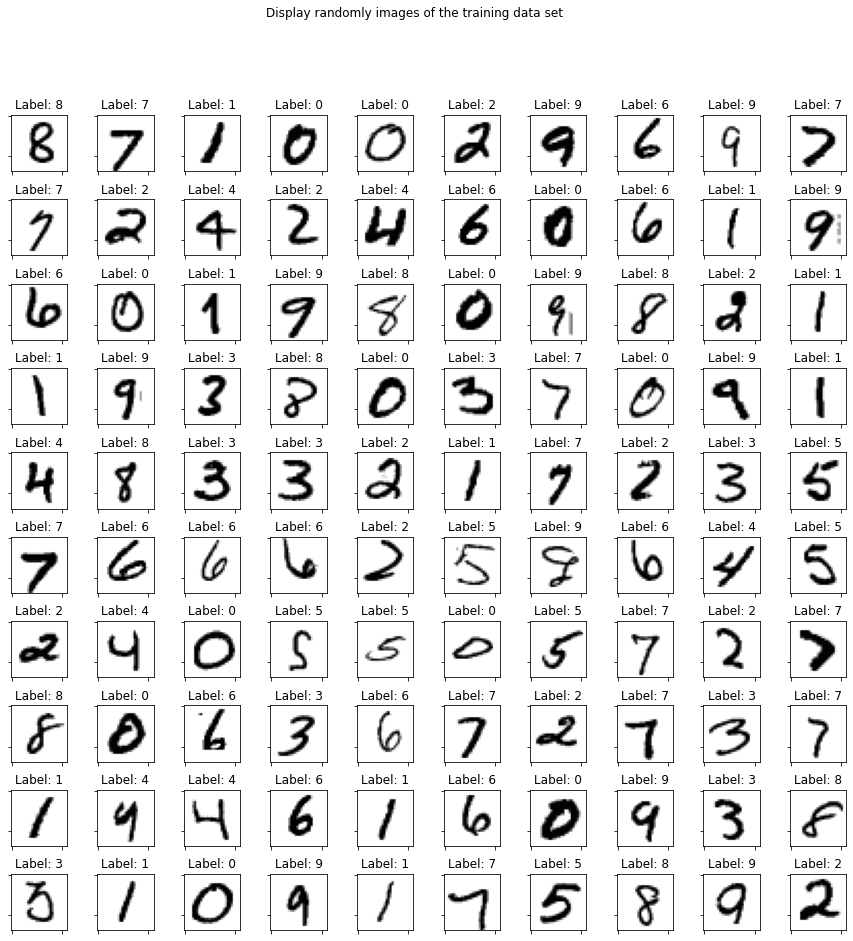

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def displayData(X,Y):
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15, 15))
    fig.suptitle('Display randomly images of the training data set')

    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind, :].reshape(28, 28) # flatten 되어있는상태여서 reshape(28, 28)로 되돌려줌
            ax[i, j].set_title("Label: {}".format(Y[ind]))
            ax[i, j].imshow(tmp, cmap='gray_r')
            plt.setp(ax[i, j].get_xticklabels(), visible=False) # 첨자 없애기
            plt.setp(ax[i, j].get_yticklabels(), visible=False)

    fig.subplots_adjust(hspace=0.5, wspace=0.5)


displayData(x_train,t_train)  

In [53]:
import numpy as np
import pickle



(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)

In [57]:
x_train.shape # 이미지가 60000개 있음

(60000, 784)

In [56]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
t_train[0].shape

In [66]:
def init_network():
    with open('C:/Users/JG/abangers/deep_learning/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1 # a1 : 1X3
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y
    


model = init_network()




# print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

In [65]:
print("W1", model['W1'].shape)
print("b1", model['b1'].shape)
print("W2", model['W2'].shape)
print("b2", model['b2'].shape)
print("W3", model['W3'].shape)
print("b3", model['b3'].shape)

W1 (784, 50)
b1 (50,)
W2 (50, 100)
b2 (100,)
W3 (100, 10)
b3 (10,)


In [68]:
x_test.shape

(10000, 784)

In [75]:
%%time
accuracy_cnt = 0

for i in range(len(x_test)):
    y = predict(model, x_test[i])
    
    if i == 0:
        print(y)
        print(t_test[i])
    p = np.argmax(y)
    if p == t_test[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x_test)))

[8.4412612e-05 2.6350660e-06 7.1549485e-04 1.2586273e-03 1.1727966e-06
 4.4990858e-05 1.6269333e-08 9.9706495e-01 9.3744839e-06 8.1831211e-04]
7
Accuracy:0.9352
Wall time: 3.07 s


In [ ]:
x, t = get_data()

network = init_network()
accuracy_cnt = 0


print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

# batch

In [78]:
x_batch = x_train[0:batch_size]
x_batch.shape

(100, 784)

In [80]:
%%time
network = init_network()
accuracy_cnt = 0
batch_size = 100
for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i : i+batch_size]
    t_batch = predict(network, x_batch)

    p = np.argmax(t_batch, axis=1)  # 열기준으로 argmax 
    accuracy_cnt += np.sum(p == t_test[i : i+batch_size])

    
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x_test)))

Accuracy:0.9207
Wall time: 261 ms
